In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, ward
from scipy.spatial.distance import pdist

In [8]:

# file_path = '/home/ubuntu/wdir/PopGenStats_Project/data/BifidoIsolates/BLongum/mummer.tsv.gz'
file_path = '/Users/Annaliese/Desktop/PopGenStats_Project/data/BifidoIsolates/BLongum/mummer.tsv'

mummer_matrix = pd.read_csv(file_path, sep='\t', index_col=0)

sample_names = sorted(set(mummer_matrix['s1']) | set(mummer_matrix['s2']))
mapper = {name: f'sample{idx}' for idx, name in enumerate(sample_names)}

mummer_matrix['ss1'] = mummer_matrix['s1'].map(mapper)
mummer_matrix['ss2'] = mummer_matrix['s2'].map(mapper)

mummer_matrix['score1'] = mummer_matrix['avg_identity1'] * (mummer_matrix['prc_aligned1'] / 100)
mummer_matrix['score2'] = mummer_matrix['avg_identity2'] * (mummer_matrix['prc_aligned2'] / 100)

mummer_matrix


,prc_aligned1,prc_aligned2,avg_identity1,avg_identity2,s1,s2,ss1,ss2,score1,score2
0,98.3926,95.0642,99.6903,99.6903,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,sample0,sample1,98.087878,94.769786
1,89.4098,85.5646,98.6762,98.6762,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,sample0,sample2,88.226193,84.431896
2,89.4810,86.9017,98.7474,98.7474,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,sample0,sample3,88.360161,85.813169
3,89.6553,84.5672,98.7345,98.7345,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,sample0,sample4,88.520712,83.497002
4,90.1945,82.0614,98.7558,98.7558,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,wdir/blongum/genomes/ncbi_dataset/data/GCA_008...,sample0,sample5,89.072300,81.040392
...,...,...,...,...,...,...,...,...,...,...
160456,77.7822,73.3819,96.6381,96.6381,wdir/blongum/genomes/ncbi_dataset/data/GCF_925...,wdir/blongum/genomes/ncbi_dataset/data/GCF_934...,sample563,sample565,75.167240,70.914874
160457,84.3246,87.7342,98.6609,98.6609,wdir/blongum/genomes/ncbi_dataset/data/GCF_925...,wdir/blongum/genomes/ncbi_dataset/data/GCF_934...,sample563,sample566,83.195409,86.559351
160458,76.6487,73.2226,96.2964,96.2964,wdir/blongum/genomes/ncbi_dataset/data/GCF_925...,wdir/blongum/genomes/ncbi_dataset/data/GCF_934...,sample564,sample565,73.809939,70.510728
160459,75.2502,79.3385,97.1016,97.1016,wdir/blongum/genomes/ncbi_dataset/data/GCF_925...,wdir/blongum/genomes/ncbi_dataset/data/GCF_934...,sample564,sample566,73.069148,77.038953


In [5]:

diagonal_data = []
for sample in sample_names:
    diagonal_data.append({
        'prc_aligned1': 100,
        'prc_aligned2': 100,
        'avg_identity1': 100,
        'avg_identity2': 100,
        's1': sample,
        's2': sample,
        'ss1': mapper[sample],
        'ss2': mapper[sample],
        'score1': 100,
        'score2': 100
    })

diagonal_df = pd.DataFrame(diagonal_data)
mummer_matrix = pd.concat([mummer_matrix, diagonal_df], ignore_index=True)

mummer_matrix = mummer_matrix.sort_values(by=['s1', 's2']).reset_index(drop=True)

mummer_matrix[['ss1', 'ss2', 'score1', 'score2']]

,ss1,ss2,score1,score2
0,sample0,sample0,100.000000,100.000000
1,sample0,sample1,98.087878,94.769786
2,sample0,sample2,88.226193,84.431896
3,sample0,sample3,88.360161,85.813169
4,sample0,sample4,88.520712,83.497002
...,...,...,...,...
161023,sample564,sample565,73.809939,70.510728
161024,sample564,sample566,73.069148,77.038953
161025,sample565,sample565,100.000000,100.000000
161026,sample565,sample566,70.108008,77.393022


In [3]:

upper_triangle = mummer_matrix.pivot(index='ss1', columns='ss2', values='score1').fillna(0)
upper_triangle = upper_triangle[sorted(upper_triangle.columns)]

lower_triangle = mummer_matrix.pivot(index='ss2', columns='ss1', values='score2').fillna(0)
lower_triangle = lower_triangle[sorted(lower_triangle.columns)]

# lower_triangle

new_mummer_matrix = upper_triangle + lower_triangle
new_mummer_matrix[:] = np.where(new_mummer_matrix==200, 100, new_mummer_matrix)
new_mummer_matrix

# lower_triangle.shape, upper_triangle.shape

ss2,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ss1,,,,,,,,,,,,,,,,,,,,,
sample0,100.000000,98.087878,88.203163,80.242080,91.179871,90.484829,89.588683,92.175049,90.142655,91.537330,...,90.998742,89.753708,89.720319,88.185731,91.994612,90.932009,93.036891,81.464259,89.856901,80.196122
sample1,94.769786,100.000000,86.918832,78.679328,89.585138,88.427648,87.833250,90.317914,88.417367,89.827598,...,89.190980,88.023050,88.347536,86.969942,90.338645,89.506795,91.791948,79.438398,88.078571,78.660824
sample10,76.578904,78.196800,100.000000,71.557116,80.779340,80.718895,81.383627,79.985415,80.939281,81.535457,...,78.720795,78.821804,82.774017,81.733179,82.477155,83.669160,84.165476,71.538882,80.011405,71.539373
sample100,69.539544,70.747370,71.942239,100.000000,74.519538,71.966255,73.977673,72.882877,75.920277,75.397037,...,72.924768,74.079447,75.166384,71.891163,74.785543,74.472376,75.157430,77.763411,72.167874,97.345901
sample101,81.046679,82.517602,83.879907,77.394322,100.000000,85.823291,87.543473,85.789410,88.974414,86.981074,...,85.426042,89.144609,89.389400,87.237554,92.205414,88.600353,89.081398,76.828172,83.916780,77.408454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,79.651038,81.254104,85.003579,75.208207,86.232897,82.790709,85.184413,84.411604,86.278892,85.839027,...,83.173356,82.807693,87.098896,86.787009,86.491025,100.000000,90.614084,74.691904,82.764531,75.216098
sample96,77.999881,79.736934,82.003737,72.593552,82.972948,80.886087,81.027107,81.262061,84.294994,84.506771,...,80.471603,80.094940,83.879860,84.174385,85.252242,86.770056,100.000000,71.353619,78.468646,72.560164
sample97,68.510360,69.177552,70.414132,75.397242,71.955266,71.390156,71.427221,70.753847,73.648505,72.759550,...,72.824939,72.077842,71.711683,72.520756,73.259906,72.756722,72.569017,100.000000,70.134336,75.284239


In [15]:
assert list(lower_triangle.columns) == list(upper_triangle.columns)
assert list(lower_triangle.index) == list(upper_triangle.index)

In [16]:
len(set(mummer_matrix['ss1']) | set(mummer_matrix['ss2']))

567

In [17]:
lower_triangle.head(1)

ss1,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ss2,,,,,,,,,,,,,,,,,,,,,
sample0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
upper_triangle.head(1)

ss2,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ss1,,,,,,,,,,,,,,,,,,,,,
sample0,100.0,98.087878,88.203163,80.24208,91.179871,90.484829,89.588683,92.175049,90.142655,91.53733,...,90.998742,89.753708,89.720319,88.185731,91.994612,90.932009,93.036891,81.464259,89.856901,80.196122


In [19]:
new_mummer_matrix.head(1)

ss2,sample0,sample1,sample10,sample100,sample101,sample102,sample103,sample104,sample105,sample106,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
ss1,,,,,,,,,,,,,,,,,,,,,
sample0,100.0,98.087878,88.203163,80.24208,91.179871,90.484829,89.588683,92.175049,90.142655,91.53733,...,90.998742,89.753708,89.720319,88.185731,91.994612,90.932009,93.036891,81.464259,89.856901,80.196122


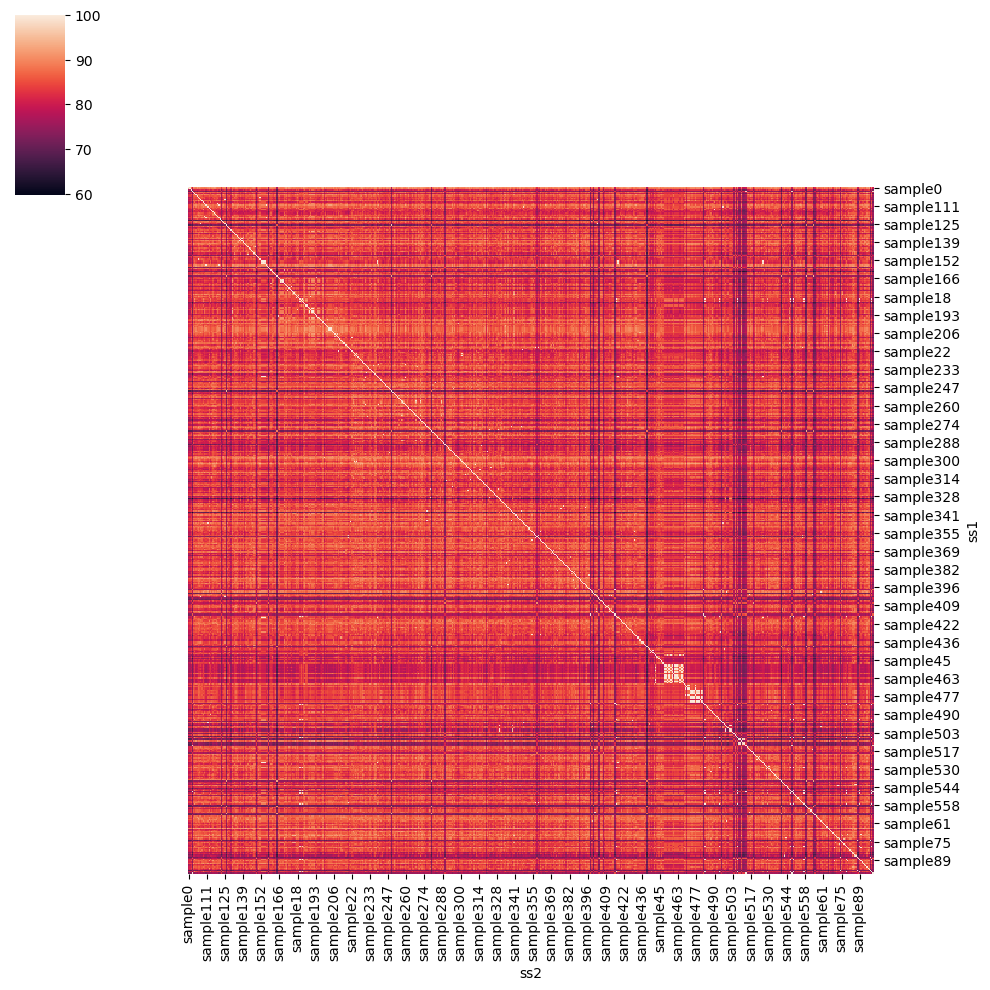

In [20]:
sns.clustermap(new_mummer_matrix, row_cluster=False, col_cluster=False)

In [21]:


print(mummer_matrix)
exit(1)

distance_matrix = pdist(mummer_matrix)
linkage_matrix = ward(distance_matrix)
print(linkage_matrix)
exit(1)

dendrogram(linkage_matrix)
plt.show()

# sns.clustermap(mummer_matrix, row_cluster=False, col_cluster=False)
# #sns.clustermap(mummer_matrix)
# plt.show()


: 